In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,20)

In [29]:
df1 = pd.read_csv('Pakistan_estate.csv')
df1.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [30]:
df1.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [31]:
df2 = df1.drop(['property_id','location_id','location','purpose','date_added','agency','agent','page_url'],axis='columns')
df2.head()

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008


In [32]:
df2.isnull().sum()

property_type    0
price            0
city             0
province_name    0
latitude         0
longitude        0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

In [33]:
from scipy import stats

df2 = df2[df2.baths != 0]
df2 = df2[df2.bedrooms != 0]
df2 = df2[df2.Total_Area != 0]

# Remove Outliers
df2 = df2[(
    np.abs(stats.zscore(df2['Total_Area'])) < 3)]
df2 = df2[(
    np.abs(stats.zscore(df2['bedrooms'])) < 3)]
df2 = df2[(
    np.abs(stats.zscore(df2['baths'])) < 3)]
df2 = df2[(
    np.abs(stats.zscore(df2['price'])) < 3)]
df2

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008
...,...,...,...,...,...,...,...,...,...
168436,House,8800000,Karachi,Sindh,25.071948,67.338656,4,3,2178.008
168437,House,5000000,Karachi,Sindh,25.067079,67.309986,4,3,1361.255
168438,House,14000000,Karachi,Sindh,25.058062,67.306626,3,3,2178.008
168439,House,14000000,Karachi,Sindh,25.005740,67.316385,4,4,3811.514


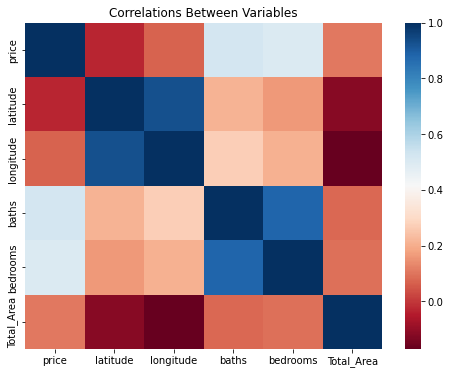

In [34]:
import seaborn as sns 
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=12)
plt.show()

<AxesSubplot:xlabel='city', ylabel='count'>

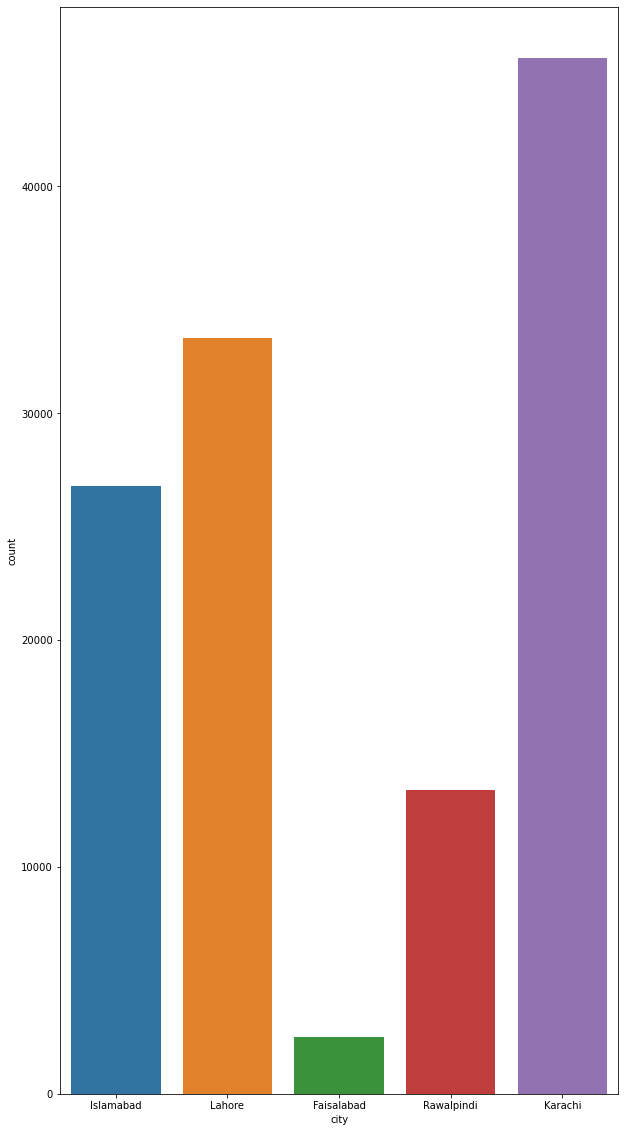

In [35]:
sns.countplot(x ='city', data = df2)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

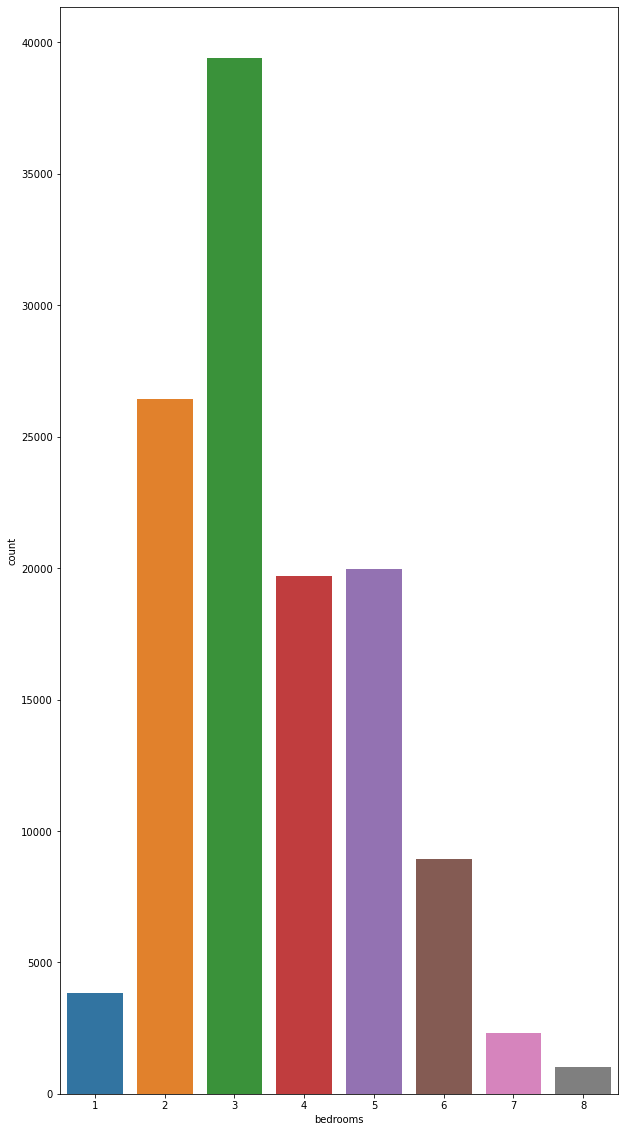

In [36]:
sns.countplot(x ='bedrooms', data = df2)

<AxesSubplot:xlabel='baths', ylabel='count'>

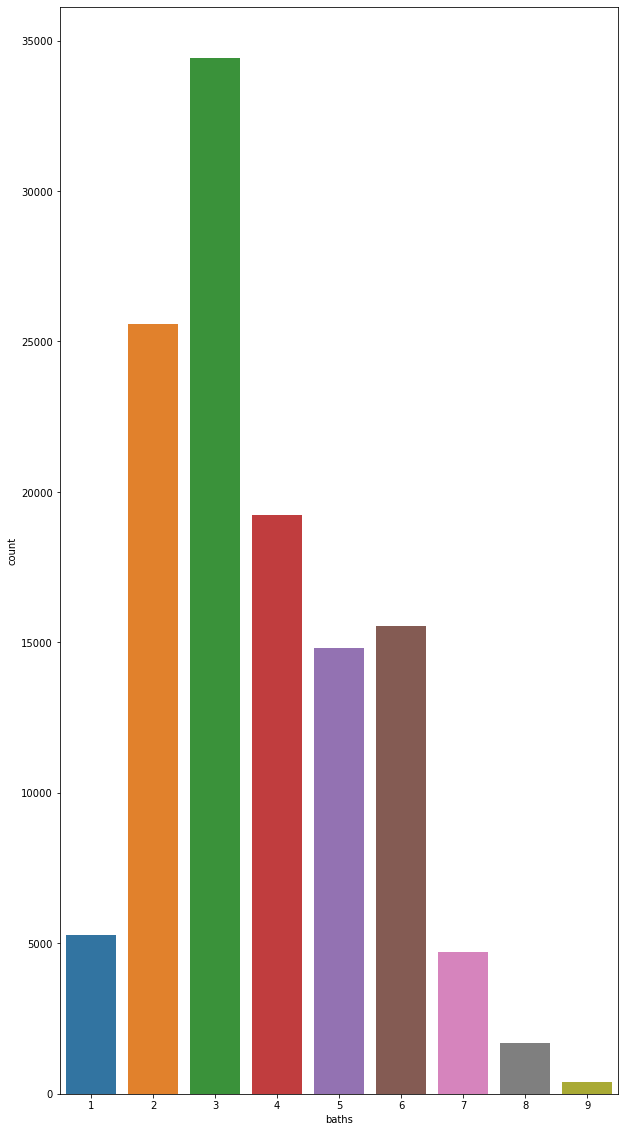

In [37]:
sns.countplot(x ='baths', data = df2)

<AxesSubplot:xlabel='province_name', ylabel='count'>

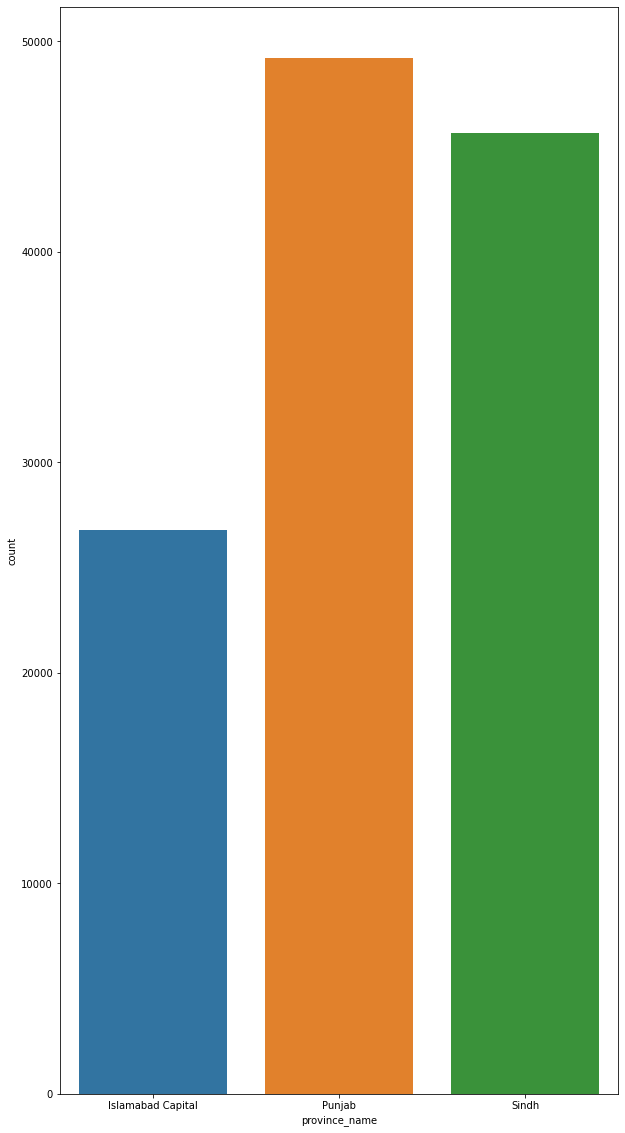

In [38]:
sns.countplot(x ='province_name', data = df2)

<AxesSubplot:xlabel='property_type', ylabel='count'>

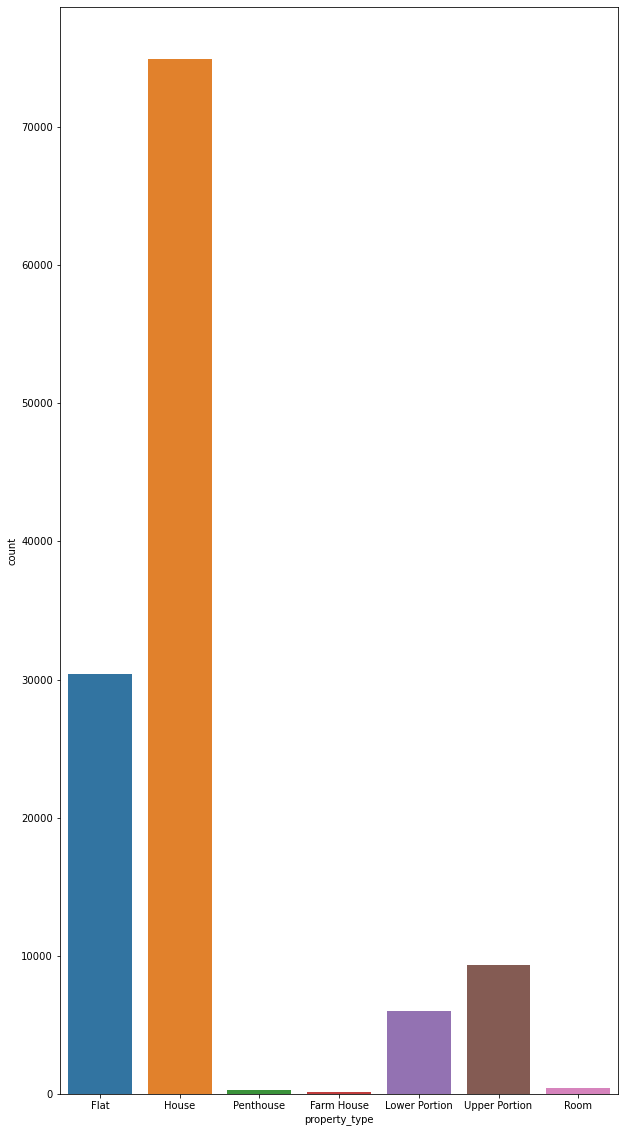

In [39]:
sns.countplot(x ='property_type', data = df2)

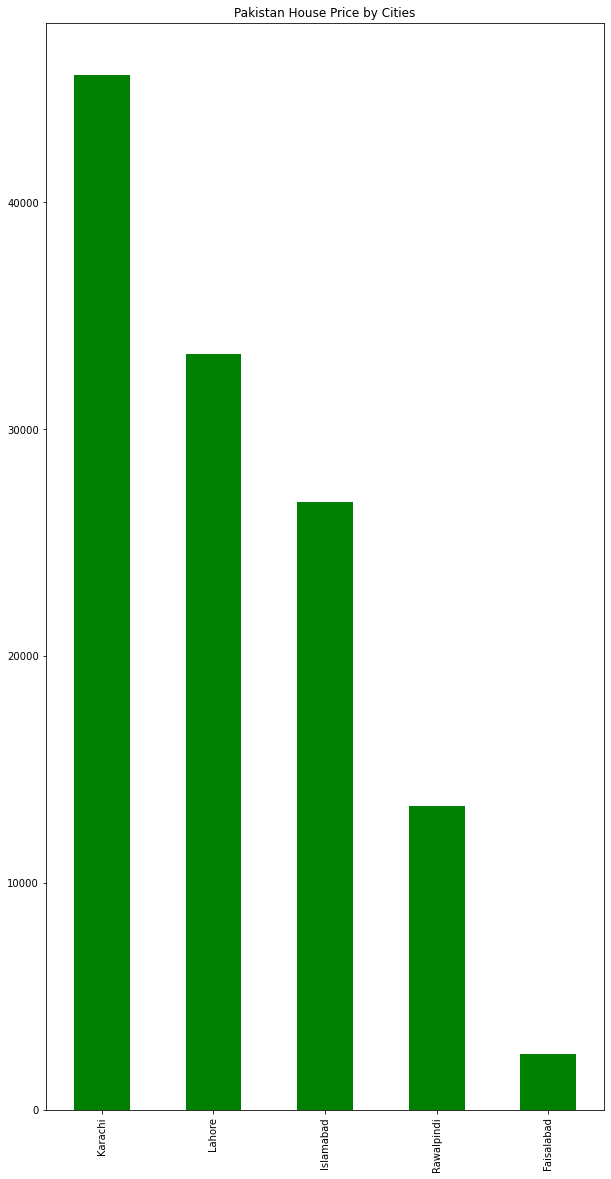

In [40]:
df2['city'].value_counts().head(10).plot(kind='bar', color='g')
plt.title('Pakistan House Price by Cities');

In [41]:
df2.groupby('city')['city'].agg('count')

city
Faisalabad     2486
Islamabad     26787
Karachi       45621
Lahore        33302
Rawalpindi    13397
Name: city, dtype: int64

In [42]:
df2.groupby('property_type')['property_type'].agg('count')

property_type
Farm House         184
Flat             30376
House            74888
Lower Portion     6010
Penthouse          282
Room               463
Upper Portion     9390
Name: property_type, dtype: int64

In [43]:
df2['price_per_area'] = df2['price']/df2['Total_Area']
df2

,property_type,price,city,province_name,latitude,longitude,baths,bedrooms,Total_Area,price_per_area
0,Flat,10000000,Islamabad,Islamabad Capital,33.679890,73.012640,2,2,1089.004,9182.702727
1,Flat,6900000,Islamabad,Islamabad Capital,33.700993,72.971492,3,3,15246.056,452.576063
2,House,16500000,Islamabad,Islamabad Capital,33.631486,72.926559,6,5,2178.008,7575.729749
3,House,43500000,Islamabad,Islamabad Capital,33.707573,73.151199,4,4,10890.000,3994.490358
4,House,7000000,Islamabad,Islamabad Capital,33.492591,73.301339,3,3,2178.008,3213.945954
...,...,...,...,...,...,...,...,...,...,...
168436,House,8800000,Karachi,Sindh,25.071948,67.338656,4,3,2178.008,4040.389200
168437,House,5000000,Karachi,Sindh,25.067079,67.309986,4,3,1361.255,3673.081091
168438,House,14000000,Karachi,Sindh,25.058062,67.306626,3,3,2178.008,6427.891909
168439,House,14000000,Karachi,Sindh,25.005740,67.316385,4,4,3811.514,3673.081091


In [44]:
property_type_n = []
city_n = []
province_n = []
for pt,c,p in zip(df2.property_type,df2.city,df2.province_name):
    if pt == 'Flat':
        property_type_n.append(1)
    elif pt == 'House':
        property_type_n.append(2)
    elif pt == 'Penthouse':
        property_type_n.append(3)
    elif pt == 'Farm House':
        property_type_n.append(4)
    elif pt == 'Room':
        property_type_n.append(5)
    elif pt == 'Lower Portion':
        property_type_n.append(6)
    elif pt == 'Upper Portion':
        property_type_n.append(7)
    

    if c == 'Islamabad':
        city_n.append(1)
    elif c == 'Karachi':
        city_n.append(2)
    elif c == 'Lahore':
        city_n.append(3)
    elif c == 'Rawalpindi':
        city_n.append(4)
    elif c == 'Faisalabad':
        city_n.append(5)
    
    if p == 'Islamabad Capital':
        province_n.append(1)
    elif p == 'Punjab':
        province_n.append(2)
    elif p == 'Sindh':
        province_n.append(3)

In [45]:
df3 = df2.drop(['property_type','city','province_name','price_per_area'],axis='columns')
df3.head()

,price,latitude,longitude,baths,bedrooms,Total_Area
0,10000000,33.679890,73.012640,2,2,1089.004
1,6900000,33.700993,72.971492,3,3,15246.056
2,16500000,33.631486,72.926559,6,5,2178.008
3,43500000,33.707573,73.151199,4,4,10890.000
4,7000000,33.492591,73.301339,3,3,2178.008


In [46]:
df_n = df3.copy()
df_n['city_n'] = city_n
df_n['poperty_type_n'] = property_type_n
df_n['province_name'] = province_n
df_n.head()

,price,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,10000000,33.679890,73.012640,2,2,1089.004,1,1,1
1,6900000,33.700993,72.971492,3,3,15246.056,1,1,1
2,16500000,33.631486,72.926559,6,5,2178.008,1,2,1
3,43500000,33.707573,73.151199,4,4,10890.000,1,2,1
4,7000000,33.492591,73.301339,3,3,2178.008,1,2,1


In [47]:
df4 = df2.drop(['Total_Area','price_per_area','baths','bedrooms','longitude','latitude','price'],axis='columns')
df4

,property_type,city,province_name
0,Flat,Islamabad,Islamabad Capital
1,Flat,Islamabad,Islamabad Capital
2,House,Islamabad,Islamabad Capital
3,House,Islamabad,Islamabad Capital
4,House,Islamabad,Islamabad Capital
...,...,...,...
168436,House,Karachi,Sindh
168437,House,Karachi,Sindh
168438,House,Karachi,Sindh
168439,House,Karachi,Sindh


In [48]:
dummy = pd.get_dummies(df4)
dummy

,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168436,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
168437,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
168438,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
168439,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [49]:
df5 = pd.concat([df3,dummy],axis='columns')
df5

,price,latitude,longitude,baths,bedrooms,Total_Area,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,...,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,province_name_Islamabad Capital,province_name_Punjab,province_name_Sindh
0,10000000,33.679890,73.012640,2,2,1089.004,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,6900000,33.700993,72.971492,3,3,15246.056,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,16500000,33.631486,72.926559,6,5,2178.008,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,43500000,33.707573,73.151199,4,4,10890.000,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,7000000,33.492591,73.301339,3,3,2178.008,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168436,8800000,25.071948,67.338656,4,3,2178.008,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
168437,5000000,25.067079,67.309986,4,3,1361.255,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
168438,14000000,25.058062,67.306626,3,3,2178.008,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
168439,14000000,25.005740,67.316385,4,4,3811.514,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [59]:
X = df_n.drop(['price'],axis='columns')
y = df_n.price
X

,latitude,longitude,baths,bedrooms,Total_Area,city_n,poperty_type_n,province_name
0,33.679890,73.012640,2,2,1089.004,1,1,1
1,33.700993,72.971492,3,3,15246.056,1,1,1
2,33.631486,72.926559,6,5,2178.008,1,2,1
3,33.707573,73.151199,4,4,10890.000,1,2,1
4,33.492591,73.301339,3,3,2178.008,1,2,1
...,...,...,...,...,...,...,...,...
168436,25.071948,67.338656,4,3,2178.008,2,2,3
168437,25.067079,67.309986,4,3,1361.255,2,2,3
168438,25.058062,67.306626,3,3,2178.008,2,2,3
168439,25.005740,67.316385,4,4,3811.514,2,2,3


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.3432936603628062

In [53]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.33937985, 0.33924614, 0.33591944, 0.33943029, 0.33783093])

In [54]:
# Find best model using GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipelin

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.251e+18, tolerance: 3.253e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+18, tolerance: 3.253e+15
  model = cd_fast.enet_coordinate_descent(
C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.87

,model,best_score,best_params
0,linear_regression,0.338361,{'normalize': True}
1,lasso,0.338361,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.507535,"{'criterion': 'mse', 'splitter': 'best'}"


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [43]:
model.fit(X_train,y_train)

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
model.predict(X_test)

array([15000000, 15000000, 15000000, ..., 15000000, 15000000, 15000000],
      dtype=int64)

In [42]:
model.score(X_test,y_test)

0.015877170025298787

In [57]:
lr_clf.predict([[33.679890,73.012640,2,2,1089.004,1,1,1]])

C:\Users\HashmatAli\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([345737.01341659])